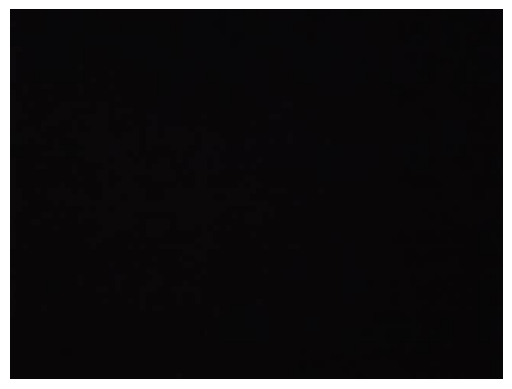


Stopped by user.


In [6]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Load a YOLOv8 pre-trained model
model = YOLO(r"C:\Users\ASUS\Desktop\flipkart round 3\yolov8n.pt")

# Open the webcam
cap = cv2.VideoCapture(2)

# Check if the webcam is opened
if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

plt.ion()  # Enable interactive mode for real-time display

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        # Perform object detection
        results = model(frame)
        detections = results[0].boxes
        class_names = model.names

        # Count objects
        object_counts = {}
        for box in detections:
            cls = int(box.cls)
            class_name = class_names[cls]
            object_counts[class_name] = object_counts.get(class_name, 0) + 1

        # Annotate the frame
        annotated_frame = results[0].plot()

        # Display the frame using Matplotlib
        clear_output(wait=True)  # Clear the previous frame
        plt.imshow(cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

except KeyboardInterrupt:
    print("Stopped by user.")
finally:
    cap.release()
